<a href="https://colab.research.google.com/github/Anjali001/Convolutional-Neural-Network/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
## MNIST data is present in Keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
## Use https://keras.io/datasets/ 
samples=mnist.load_data()
type(samples)
## This dataset is a set of 2 tuples. One for Training and other for testing
(Train_samples,Train_targets),(Test_samples,Test_targets)=samples
# Step 1 : Know your data
print(len(Train_samples))
print(Train_samples.shape)
print(len(Train_targets))
print(Train_targets.shape)
print(len(Test_samples))
print(Test_samples.shape)
print(len(Test_targets))
print(Test_targets.shape)
print(np.amax(Train_samples)) # Max value
print(np.amin(Train_samples))#Min Value


60000
(60000, 28, 28)
60000
(60000,)
10000
(10000, 28, 28)
10000
(10000,)
255
0


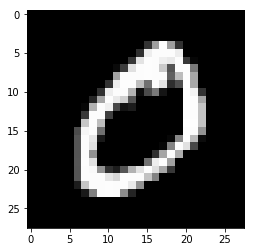

Label of image is 0


In [2]:
# Step 2 : See how data looks like
%matplotlib inline
import matplotlib.pyplot as plt

pixels = Train_samples[1] # Shape (28, 28)
plt.imshow(pixels, cmap='gray')
plt.show()
print('Label of image is', Train_targets[1])

In [0]:
# Step 3 : Reshape the data . 1 at last signifies that it's a grey scale image. 3 is used for RGB images.
Train_samples=Train_samples.reshape(Train_samples.shape[0], 28, 28, 1)
Test_samples =Test_samples.reshape(Test_samples.shape[0], 28, 28, 1)

In [0]:
# Step 4 : Scaling the input features between 0-1
Train_samples=Train_samples/255
Test_samples =Test_samples/255

In [0]:
# Step 6 : One-Hot Encoding
from keras.utils import to_categorical
Train_targets = to_categorical(Train_targets,num_classes=10)
Test_targets = to_categorical(Test_targets,num_classes=10)

In [7]:
# Step 7 : Creating the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss=['categorical_crossentropy'],metrics=['accuracy'])


W0730 07:12:07.284680 140633671989120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 07:12:07.304354 140633671989120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 07:12:07.307594 140633671989120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 07:12:07.344063 140633671989120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0730 07:12:07.347279 140633671989120 deprecation_wrapp

In [8]:
# Step 8 : Understanding the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [9]:
# Step 9 : Training the model
model.fit(Train_samples,Train_targets, validation_split = 0.1, epochs=10, batch_size=1000)


W0730 07:12:07.712352 140633671989120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 126s 2ms/step - loss: 0.6007 - acc: 0.8144 - val_loss: 0.1164 - val_acc: 0.9695
Epoch 2/10
54000/54000 [==============================] - 125s 2ms/step - loss: 0.1579 - acc: 0.9535 - val_loss: 0.0694 - val_acc: 0.9828
Epoch 3/10
54000/54000 [==============================] - 129s 2ms/step - loss: 0.1025 - acc: 0.9699 - val_loss: 0.0517 - val_acc: 0.9865
Epoch 4/10
54000/54000 [==============================] - 153s 3ms/step - loss: 0.0808 - acc: 0.9758 - val_loss: 0.0476 - val_acc: 0.9870
Epoch 5/10
54000/54000 [==============================] - 125s 2ms/step - loss: 0.0667 - acc: 0.9804 - val_loss: 0.0412 - val_acc: 0.9902
Epoch 6/10
54000/54000 [==============================] - 124s 2ms/step - loss: 0.0592 - acc: 0.9819 - val_loss: 0.0432 - val_acc: 0.9895
Epoch 7/10
54000/54000 [==============================] - 124s 2ms/step - loss: 0.0529 - acc: 0.9829 - val_loss: 0.0393 - v

In [10]:
# Step 10 : Testing the model
testing=model.evaluate(Test_samples,Test_targets)
print("\n%s: %.2f%%" % (model.metrics_names[1]+'uracy of Model on testing data', testing[1]*100))

10000/10000 [==============================] - 7s 722us/step

accuracy of Model on testing data: 99.05%


In [11]:
#Step 11 : Evaluate teh model 
##Compute a confusion matrix for each class or sample (0-9)
from sklearn.metrics import multilabel_confusion_matrix 
predictions=np.round(model.predict(Test_samples))
print(multilabel_confusion_matrix(Test_targets,predictions))

[[[9012    8]
  [   4  976]]

 [[8860    5]
  [  11 1124]]

 [[8957   11]
  [  11 1021]]

 [[8975   15]
  [   4 1006]]

 [[9015    3]
  [  11  971]]

 [[9101    7]
  [   9  883]]

 [[9033    9]
  [  15  943]]

 [[8966    6]
  [  13 1015]]

 [[9012   14]
  [   8  966]]

 [[8983    8]
  [  16  993]]]
